In [1]:
import numpy as np
from PIL import Image
 
from matplotlib import pyplot as plt
 
import scipy.io as sio
 
import numpy as np
import cv2 
import pyrealsense2 as rs
from threading import Thread
import time

In [2]:
class MyRealSense:
    def __init__(self):
        self.pipe = rs.pipeline()
        self.profile = self.pipe.start()
        self.isalive=True
        self.current_frame=None 

    def get_current_frame(self, scale=0.5):
        frames = self.pipe.wait_for_frames()
        color_frame = frames.get_color_frame() 

        image=np.asanyarray(color_frame.get_data())
        image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        image = cv2.resize(image, (int(image.shape[1]*scale), int(image.shape[0]*scale) ) , interpolation = cv2.INTER_AREA)
        return image 
    
    def run(self):
        while self.isalive:
            self.current_frame=self.get_current_frame() 

    def close(self):
        self.isalive=False
        self.pipe.stop()

In [3]:
class CVCamera:
    def __init__(self, camera_id=0):
        self.camera_id=camera_id
        self.cap = cv2.VideoCapture(camera_id)
        self.isalive=True
        self.current_frame=None
        
    def get_current_frame(self, scale=0.5):
        ret, image = self.cap.read()
        image = cv2.resize(image, (int(image.shape[1]*scale), int(image.shape[0]*scale) ) , interpolation = cv2.INTER_AREA)
        return image 

    def run(self):
        while self.isalive:
            ret, frame = self.cap.read()
            self.current_frame=frame

    def close(self):
        self.isalive=False
        self.cap.release()

In [4]:
!v4l2-ctl --list-devices

Intel(R) RealSense(TM) Depth Ca (usb-0000:00:14.0-1):
	/dev/video0
	/dev/video1
	/dev/video2
	/dev/video3
	/dev/video4
	/dev/video5
	/dev/media0
	/dev/media1

Streaming Camera W2G: Streaming (usb-0000:00:14.0-3.1):
	/dev/video6
	/dev/video7
	/dev/media2



In [5]:
cam_wrist=MyRealSense()
cam_front=CVCamera(6)

In [6]:
# t1 = Thread(target=cam_wrist.run)
# t1.start()

# t2 = Thread(target=cam_front.run)
# t2.start()

In [15]:
image_wrist.shape, image_front.shape

((240, 320, 3), (240, 320, 3))

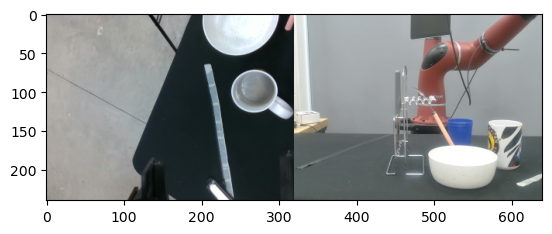

In [21]:
st=time.time()
image_wrist=cam_wrist.get_current_frame()
image_front=cam_front.get_current_frame()
image=np.concatenate([image_wrist, image_front], axis=1)
dt=time.time()-st

image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image)

In [22]:
dt, 1/dt

(0.006916046142578125, 144.59128516271375)

In [24]:
images=[]
st=time.time()
while cam_front.isalive and cam_wrist.isalive:
     
    image_wrist=cam_wrist.get_current_frame()
    image_front=cam_front.get_current_frame()
    image=np.concatenate([image_wrist, image_front], axis=1)
    images.append(image)

    cv2.imshow('frame',image)
    if cv2.waitKey(1) == 27: 
        break  # esc to quit
cv2.destroyAllWindows()    
dt=time.time()-st

dt, len(images), 1/dt

(22.180383443832397, 334, 0.04508488333992556)

In [25]:
len(images) / dt

15.058351035535138